## Problem Statement

* Load the dataset into pandas and get a peek at the underlying data in the dataframe.
* Provide the following information about the dataframe;
           1)Dimensions of the dataframe
           2)Information about the schema
           3)Statistical metrics of each column
* Conduct the following data pre-processing steps only as necessary along with the reason behind doing it with suitable steps;
           1)Missing values
           2)Erroneous/wrong values
           3)Skewed data
           4)Outliers
* Perform exploratory data analysis and provide key insights derived from the same backed with suitable graphs and plots. Few hints to get you started;
           1)Distribution of numerical variables
           2)Distribution of categorical variables
           3)Numerical vs Categorical plots
           4)Numerical vs Numerical plots

# Introduction

### Dataset Description:
* The house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.

### Variables in order:

| Variables | Deatails of variables |
| --- | --- |
|CRIM | per capita crime rate by town |
| --- | --- |
| ZN |proportion of residential land zoned for lots over 25,000 sq.ft. |
| --- | --- |
| INDUS | proportion of non-retail business acres per town |
| --- | --- |
| CHAS | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| --- | --- |
| NOX |nitric oxides concentration (parts per 10 million) |
| --- | --- |
| RM |average number of rooms per dwelling |
| --- | --- |
| AGE |proportion of owner-occupied units built prior to 1940 |
| --- | --- |
| DIS |weighted distances to five Boston employment centres |
| RAD |index of accessibility to radial highways |
| --- | --- |
| TAX | full-value property-tax rate per doller 10,000|
| --- | --- |
| PTRATIO | pupil-teacher ratio by town |
| --- | --- |
| B | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| --- | --- |
| LSTAT | % lower status of the population |
| --- | --- |
| MEDV | Median value of owner-occupied homes in $1000's |

### Boston house prices dataset
* Data Set Characteristics:  
* Number of Instances: 506 
* Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
* Attribute Information (in order):
        1)CRIM     per capita crime rate by town
        2)ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3)INDUS    proportion of non-retail business acres per town
        4)CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5)NOX      nitric oxides concentration (parts per 10 million)
        6)RM       average number of rooms per dwelling
        7)AGE      proportion of owner-occupied units built prior to 1940
        8)DIS      weighted distances to five Boston employment centres
        9)RAD      index of accessibility to radial highways
        10)TAX      full-value property-tax rate per doller 10,000
        11)PTRATIO  pupil-teacher ratio by town
        12)B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13)LSTAT    % lower status of the population
        14)MEDV     Median value of owner-occupied homes in $1000's

* Missing Attribute Values: None
* Creator: Harrison, D. and Rubinfeld, D.L.
* This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
* This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
* The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
  prices and the demand for clean air', J. Environ. Economics & Management,
  vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
  ...', Wiley, 1980.   N.B. Various transformations are used in the table on
  pages 244-261 of the latter.
* The Boston house-price data has been used in many machine learning papers that address regression
  problems.   
* .. topic:: References
 - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
  - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

In [1]:
# importing all required library
import pandas as pd # Data Manipulation
import numpy as np # Data Manipulation
from matplotlib import pyplot as plt # data Visualization
import seaborn as sns # Data Visualization
import missingno as msno # For Missing values
from scipy import stats
import os

* We will first create a dataframe with the features and their respective names (recall that the feature data is stored in the data attribute and the list of feature names is stored in name):

In [2]:
# creating a list of column names
name=['CRIM', 'ZN', 'INDUS', 'CHAS' ,'NOX' , 'RM' ,'AGE' ,'DIS', 'RAD','TAX' ,'PTRATIO' ,'B' ,'LSTAT' ,'MEDV' ] 
# Read the dataset with giving column names
Housing = pd.read_csv("C:/Users/DELL/Downloads/housing.csv",names=name,delimiter=r"\s+")
Housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Basic Exploration:

In [3]:
# To see python read each variable correct or not
Housing.info() # here i used the info function to see how python read each type of variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


* From description of dataset CHAS and RAD is a categorycal variable but read as integer i will convert the datatype

In [4]:
# change the datatype of variable CHAS numerical to Categorical
Housing = Housing.astype({'CHAS': 'category','RAD': 'category'}) # here i used the astypye function to change the data type

In [5]:
# To check type of variable changed or not
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [6]:
# To see First 5 rows of the dataset
Housing.head() # use .head() fun to see how data is distributed starting of the table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
# To see Last Five rows of the dataset
Housing.tail() # use .tail() fun to see How data is distributed end of the table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [8]:
# To see Total Number of observations and Columns
Housing.shape # here i used .shape to see total number of observations and features

(506, 14)

In [9]:
# To see Dimension of the dataset
Housing.ndim # here i used n.dim function to see the dimension

2

In [10]:
# Columns present in the dataset
Housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
# To see unique value in each column
Housing.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

##  Information about the schema

In [12]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [13]:
# To check there is any duplicate or not
Housing.duplicated().sum()

0

## Statistical metrics of each column

In [14]:
# Generating descriptive statistics summary
Housing.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000
unique,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,471.0,NaN,NaN,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN
mean,3.613524,11.363636,11.136779,NaN,0.554695,6.284634,68.574901,3.795043,NaN,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,NaN,0.115878,0.702617,28.148861,2.105710,NaN,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,NaN,0.385000,3.561000,2.900000,1.129600,NaN,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,NaN,0.449000,5.885500,45.025000,2.100175,NaN,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,NaN,0.538000,6.208500,77.500000,3.207450,NaN,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,NaN,0.624000,6.623500,94.075000,5.188425,NaN,666.000000,20.200000,396.225000,16.955000,25.000000


* Here i used .describe function to see in data more detail.numerical columns gives us five point summery.and other columns are categorical columns.

## Analyzing the amount of missing data

In [15]:
# To check Total number of missing values
Housing.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

* data.isnull() function gives us information of missing values in the form of boolean.True mean there is missing value and False mean there is no missing values. .sum() function count total of true and gives us total number of mising values.

<AxesSubplot:>

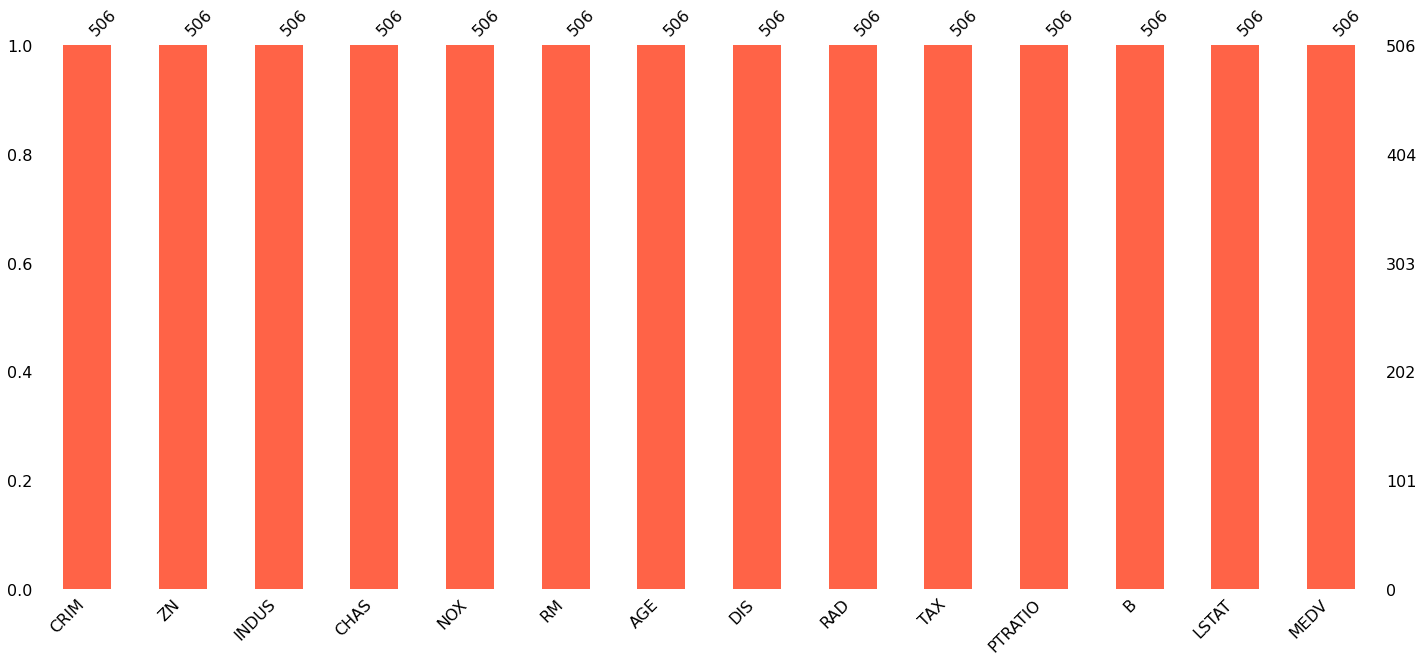

In [16]:
# plotting a bar plot for information of missing values
msno.bar(Housing, color = 'tomato')

## From above calulation and gragh we can clearly see there is no missing values so we don't have to deal with any missing values.

## Anlyzing the erroneous/wrong values

* To find there is any wrong value or not i have to cheack unique values of each columns.

In [17]:
# To check unique values of CRIM
Housing.CRIM.unique()

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [18]:
# To check unique values of ZN columns
Housing.ZN.unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [19]:
# To check unique values of INDUS column
Housing.INDUS.unique()

array([ 2.31,  7.07,  2.18,  7.87,  8.14,  5.96,  2.95,  6.91,  5.64,
        4.  ,  1.22,  0.74,  1.32,  5.13,  1.38,  3.37,  6.07, 10.81,
       12.83,  4.86,  4.49,  3.41, 15.04,  2.89,  8.56, 10.01, 25.65,
       21.89, 19.58,  4.05,  2.46,  3.44,  2.93,  0.46,  1.52,  1.47,
        2.03,  2.68, 10.59, 13.89,  6.2 ,  4.93,  5.86,  3.64,  3.75,
        3.97,  6.96,  6.41,  3.33,  1.21,  2.97,  2.25,  1.76,  5.32,
        4.95, 13.92,  2.24,  6.09,  9.9 ,  7.38,  3.24,  6.06,  5.19,
        1.89,  3.78,  4.39,  4.15,  2.01,  1.25,  1.69,  2.02,  1.91,
       18.1 , 27.74,  9.69, 11.93])

In [20]:
# To check unique values of CHAS column
Housing.CHAS.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [21]:
# To check unique values of NOX colums
Housing.NOX.unique()

array([0.538 , 0.469 , 0.458 , 0.524 , 0.499 , 0.428 , 0.448 , 0.439 ,
       0.41  , 0.403 , 0.411 , 0.453 , 0.4161, 0.398 , 0.409 , 0.413 ,
       0.437 , 0.426 , 0.449 , 0.489 , 0.464 , 0.445 , 0.52  , 0.547 ,
       0.581 , 0.624 , 0.871 , 0.605 , 0.51  , 0.488 , 0.401 , 0.422 ,
       0.404 , 0.415 , 0.55  , 0.507 , 0.504 , 0.431 , 0.392 , 0.394 ,
       0.647 , 0.575 , 0.447 , 0.4429, 0.4   , 0.389 , 0.385 , 0.405 ,
       0.433 , 0.472 , 0.544 , 0.493 , 0.46  , 0.4379, 0.515 , 0.442 ,
       0.518 , 0.484 , 0.429 , 0.435 , 0.77  , 0.718 , 0.631 , 0.668 ,
       0.671 , 0.7   , 0.693 , 0.659 , 0.597 , 0.679 , 0.614 , 0.584 ,
       0.713 , 0.74  , 0.655 , 0.58  , 0.532 , 0.583 , 0.609 , 0.585 ,
       0.573 ])

In [22]:
# To check unique values of RM 
Housing.RM.unique()

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 6.047,
       6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 5.933, 5.841, 5.85 ,
       5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069, 5.682, 5.786,
       6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998, 5.888, 7.249,
       6.383, 6.816, 6.145, 5.927, 5.741, 6.456, 6.762, 7.104, 6.29 ,
       5.787, 5.878, 5.594, 5.885, 6.417, 5.961, 6.065, 6.245, 6.273,
       6.286, 6.279, 6.14 , 6.232, 5.874, 6.727, 6.619, 6.302, 6.167,
       6.389, 6.63 , 6.015, 6.121, 7.007, 7.079, 6.405, 6.442, 6.249,
       6.625, 6.163, 8.069, 7.82 , 7.416, 6.781, 6.137, 5.851, 5.836,
       6.127, 6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928,
       6.176, 6.021, 5.872, 5.731, 5.87 , 5.856, 5.879, 5.986, 5.613,
       5.693, 6.431, 5.637, 6.458, 6.326, 6.372, 5.822, 5.757, 6.335,
       5.942, 6.454,

In [23]:
# To check unique value of AGE column
Housing.AGE.unique()

array([ 65.2,  78.9,  61.1,  45.8,  54.2,  58.7,  66.6,  96.1, 100. ,
        85.9,  94.3,  82.9,  39. ,  61.8,  84.5,  56.5,  29.3,  81.7,
        36.6,  69.5,  98.1,  89.2,  91.7,  94.1,  85.7,  90.3,  88.8,
        94.4,  87.3,  82. ,  95. ,  96.9,  68.2,  61.4,  41.5,  30.2,
        21.8,  15.8,   2.9,   6.6,   6.5,  40. ,  33.8,  33.3,  85.5,
        95.3,  62. ,  45.7,  63. ,  21.1,  21.4,  47.6,  21.9,  35.7,
        40.5,  29.2,  47.2,  66.2,  93.4,  67.8,  43.4,  59.5,  17.8,
        31.1,  36.8,  33. ,  17.5,   7.8,   6.2,   6. ,  45. ,  74.5,
        53.7,  33.5,  70.4,  32.2,  46.7,  48. ,  56.1,  45.1,  56.8,
        86.3,  63.1,  66.1,  73.9,  53.6,  28.9,  77.3,  57.8,  69.6,
        76. ,  36.9,  62.5,  79.9,  71.3,  85.4,  87.4,  90. ,  96.7,
        91.9,  85.2,  97.1,  91.2,  54.4,  81.6,  92.9,  95.4,  84.2,
        88.2,  72.5,  82.6,  73.1,  69.7,  84.1,  97. ,  95.8,  88.4,
        95.6,  96. ,  98.8,  94.7,  98.9,  97.7,  97.9,  98.4,  98.2,
        93.5,  93.6,

In [24]:
# To check unique value of DIS columns
Housing.DIS.unique()

array([ 4.09  ,  4.9671,  6.0622,  5.5605,  5.9505,  6.0821,  6.5921,
        6.3467,  6.2267,  5.4509,  4.7075,  4.4619,  4.4986,  4.2579,
        3.7965,  3.7979,  4.0123,  3.9769,  4.0952,  4.3996,  4.4546,
        4.682 ,  4.4534,  4.4547,  4.239 ,  4.233 ,  4.175 ,  3.99  ,
        3.7872,  3.7598,  3.3603,  3.3779,  3.9342,  3.8473,  5.4011,
        5.7209,  5.1004,  5.6894,  5.87  ,  6.0877,  6.8147,  7.3197,
        8.6966,  9.1876,  8.3248,  7.8148,  6.932 ,  7.2254,  6.8185,
        7.2255,  7.9809,  9.2229,  6.6115,  6.498 ,  5.2873,  4.2515,
        4.5026,  4.0522,  4.0905,  5.0141,  5.4007,  4.7794,  4.4377,
        4.4272,  3.7476,  3.4217,  3.4145,  3.0923,  3.0921,  3.6659,
        3.615 ,  3.4952,  2.7778,  2.8561,  2.7147,  2.421 ,  2.1069,
        2.211 ,  2.1224,  2.4329,  2.5451,  2.6775,  2.3534,  2.548 ,
        2.2565,  2.4631,  2.7301,  2.7474,  2.4775,  2.7592,  2.2577,
        2.1974,  2.0869,  1.9444,  2.0063,  1.9929,  1.7572,  1.7883,
        1.8125,  1.9

In [25]:
# To check unique values of RAD
Housing.RAD.unique()

[1, 2, 3, 5, 4, 8, 6, 7, 24]
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 24]

In [26]:
# To check unique values of Tax column
Housing.TAX.unique()

array([296., 242., 222., 311., 307., 279., 252., 233., 243., 469., 226.,
       313., 256., 284., 216., 337., 345., 305., 398., 281., 247., 270.,
       276., 384., 432., 188., 437., 403., 193., 265., 255., 329., 402.,
       348., 224., 277., 300., 330., 315., 244., 264., 223., 254., 198.,
       285., 241., 293., 245., 289., 358., 304., 287., 430., 422., 370.,
       352., 351., 280., 335., 411., 187., 334., 666., 711., 391., 273.])

In [27]:
# To check unique values of PRATIO column
Housing.PTRATIO.unique()

array([15.3, 17.8, 18.7, 15.2, 21. , 19.2, 18.3, 17.9, 16.8, 21.1, 17.3,
       15.1, 19.7, 18.6, 16.1, 18.9, 19. , 18.5, 18.2, 18. , 20.9, 19.1,
       21.2, 14.7, 16.6, 15.6, 14.4, 12.6, 17. , 16.4, 17.4, 15.9, 13. ,
       17.6, 14.9, 13.6, 16. , 14.8, 18.4, 19.6, 16.9, 20.2, 15.5, 18.8,
       22. , 20.1])

In [28]:
# To check unique values of B column
Housing.B.unique()

array([3.9690e+02, 3.9283e+02, 3.9463e+02, 3.9412e+02, 3.9560e+02,
       3.8663e+02, 3.8671e+02, 3.9252e+02, 3.9050e+02, 3.8002e+02,
       3.9562e+02, 3.8685e+02, 3.8675e+02, 2.8899e+02, 3.9095e+02,
       3.7657e+02, 3.9253e+02, 3.9454e+02, 3.9433e+02, 3.0342e+02,
       3.7688e+02, 3.0638e+02, 3.8794e+02, 3.8023e+02, 3.6017e+02,
       3.7673e+02, 2.3260e+02, 3.5877e+02, 2.4831e+02, 3.7756e+02,
       3.9343e+02, 3.9563e+02, 3.8541e+02, 3.8337e+02, 3.9446e+02,
       3.8939e+02, 3.9274e+02, 3.9556e+02, 3.9397e+02, 3.9593e+02,
       3.9290e+02, 3.9068e+02, 3.9511e+02, 3.7808e+02, 3.9558e+02,
       3.9324e+02, 3.9621e+02, 3.8373e+02, 3.7694e+02, 3.9091e+02,
       3.7717e+02, 3.9492e+02, 3.8323e+02, 3.7366e+02, 3.8696e+02,
       3.8640e+02, 3.9606e+02, 3.9064e+02, 3.9230e+02, 3.9599e+02,
       3.9515e+02, 3.9218e+02, 3.9355e+02, 3.9501e+02, 3.9633e+02,
       3.5798e+02, 3.9183e+02, 3.9353e+02, 3.9476e+02, 7.0800e+01,
       3.9447e+02, 3.9269e+02, 3.9405e+02, 3.9567e+02, 3.8769e

In [29]:
# To check unique values of LSTAT column
Housing.LSTAT.unique()

array([ 4.98,  9.14,  4.03,  2.94,  5.33,  5.21, 12.43, 19.15, 29.93,
       17.1 , 20.45, 13.27, 15.71,  8.26, 10.26,  8.47,  6.58, 14.67,
       11.69, 11.28, 21.02, 13.83, 18.72, 19.88, 16.3 , 16.51, 14.81,
       17.28, 12.8 , 11.98, 22.6 , 13.04, 27.71, 18.35, 20.34,  9.68,
       11.41,  8.77, 10.13,  4.32,  1.98,  4.84,  5.81,  7.44,  9.55,
       10.21, 14.15, 18.8 , 30.81, 16.2 , 13.45,  9.43,  5.28,  8.43,
       14.8 ,  4.81,  5.77,  3.95,  6.86,  9.22, 13.15, 14.44,  6.73,
        9.5 ,  8.05,  4.67, 10.24,  8.1 , 13.09,  8.79,  6.72,  9.88,
        5.52,  7.54,  6.78,  8.94, 11.97, 10.27, 12.34,  9.1 ,  5.29,
        7.22,  7.51,  9.62,  6.53, 12.86,  8.44,  5.5 ,  5.7 ,  8.81,
        8.2 ,  8.16,  6.21, 10.59,  6.65, 11.34,  4.21,  3.57,  6.19,
        9.42,  7.67, 10.63, 13.44, 12.33, 16.47, 18.66, 14.09, 12.27,
       15.55, 13.  , 10.16, 16.21, 17.09, 10.45, 15.76, 12.04, 10.3 ,
       15.37, 13.61, 14.37, 14.27, 17.93, 25.41, 17.58, 27.26, 17.19,
       15.39, 18.34,

In [30]:
# To check unique values of MEDV column
Housing.MEDV.unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

### From Above exploration i can see in this dataset ther is no any special character like '.', '#', and there is no missing values

## To check skewness of variable

In [31]:
# create a list of numerical variables
numericals1 = Housing.select_dtypes(include = 'number').columns

In [32]:
# importing the warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning) # from warning import simplefilter

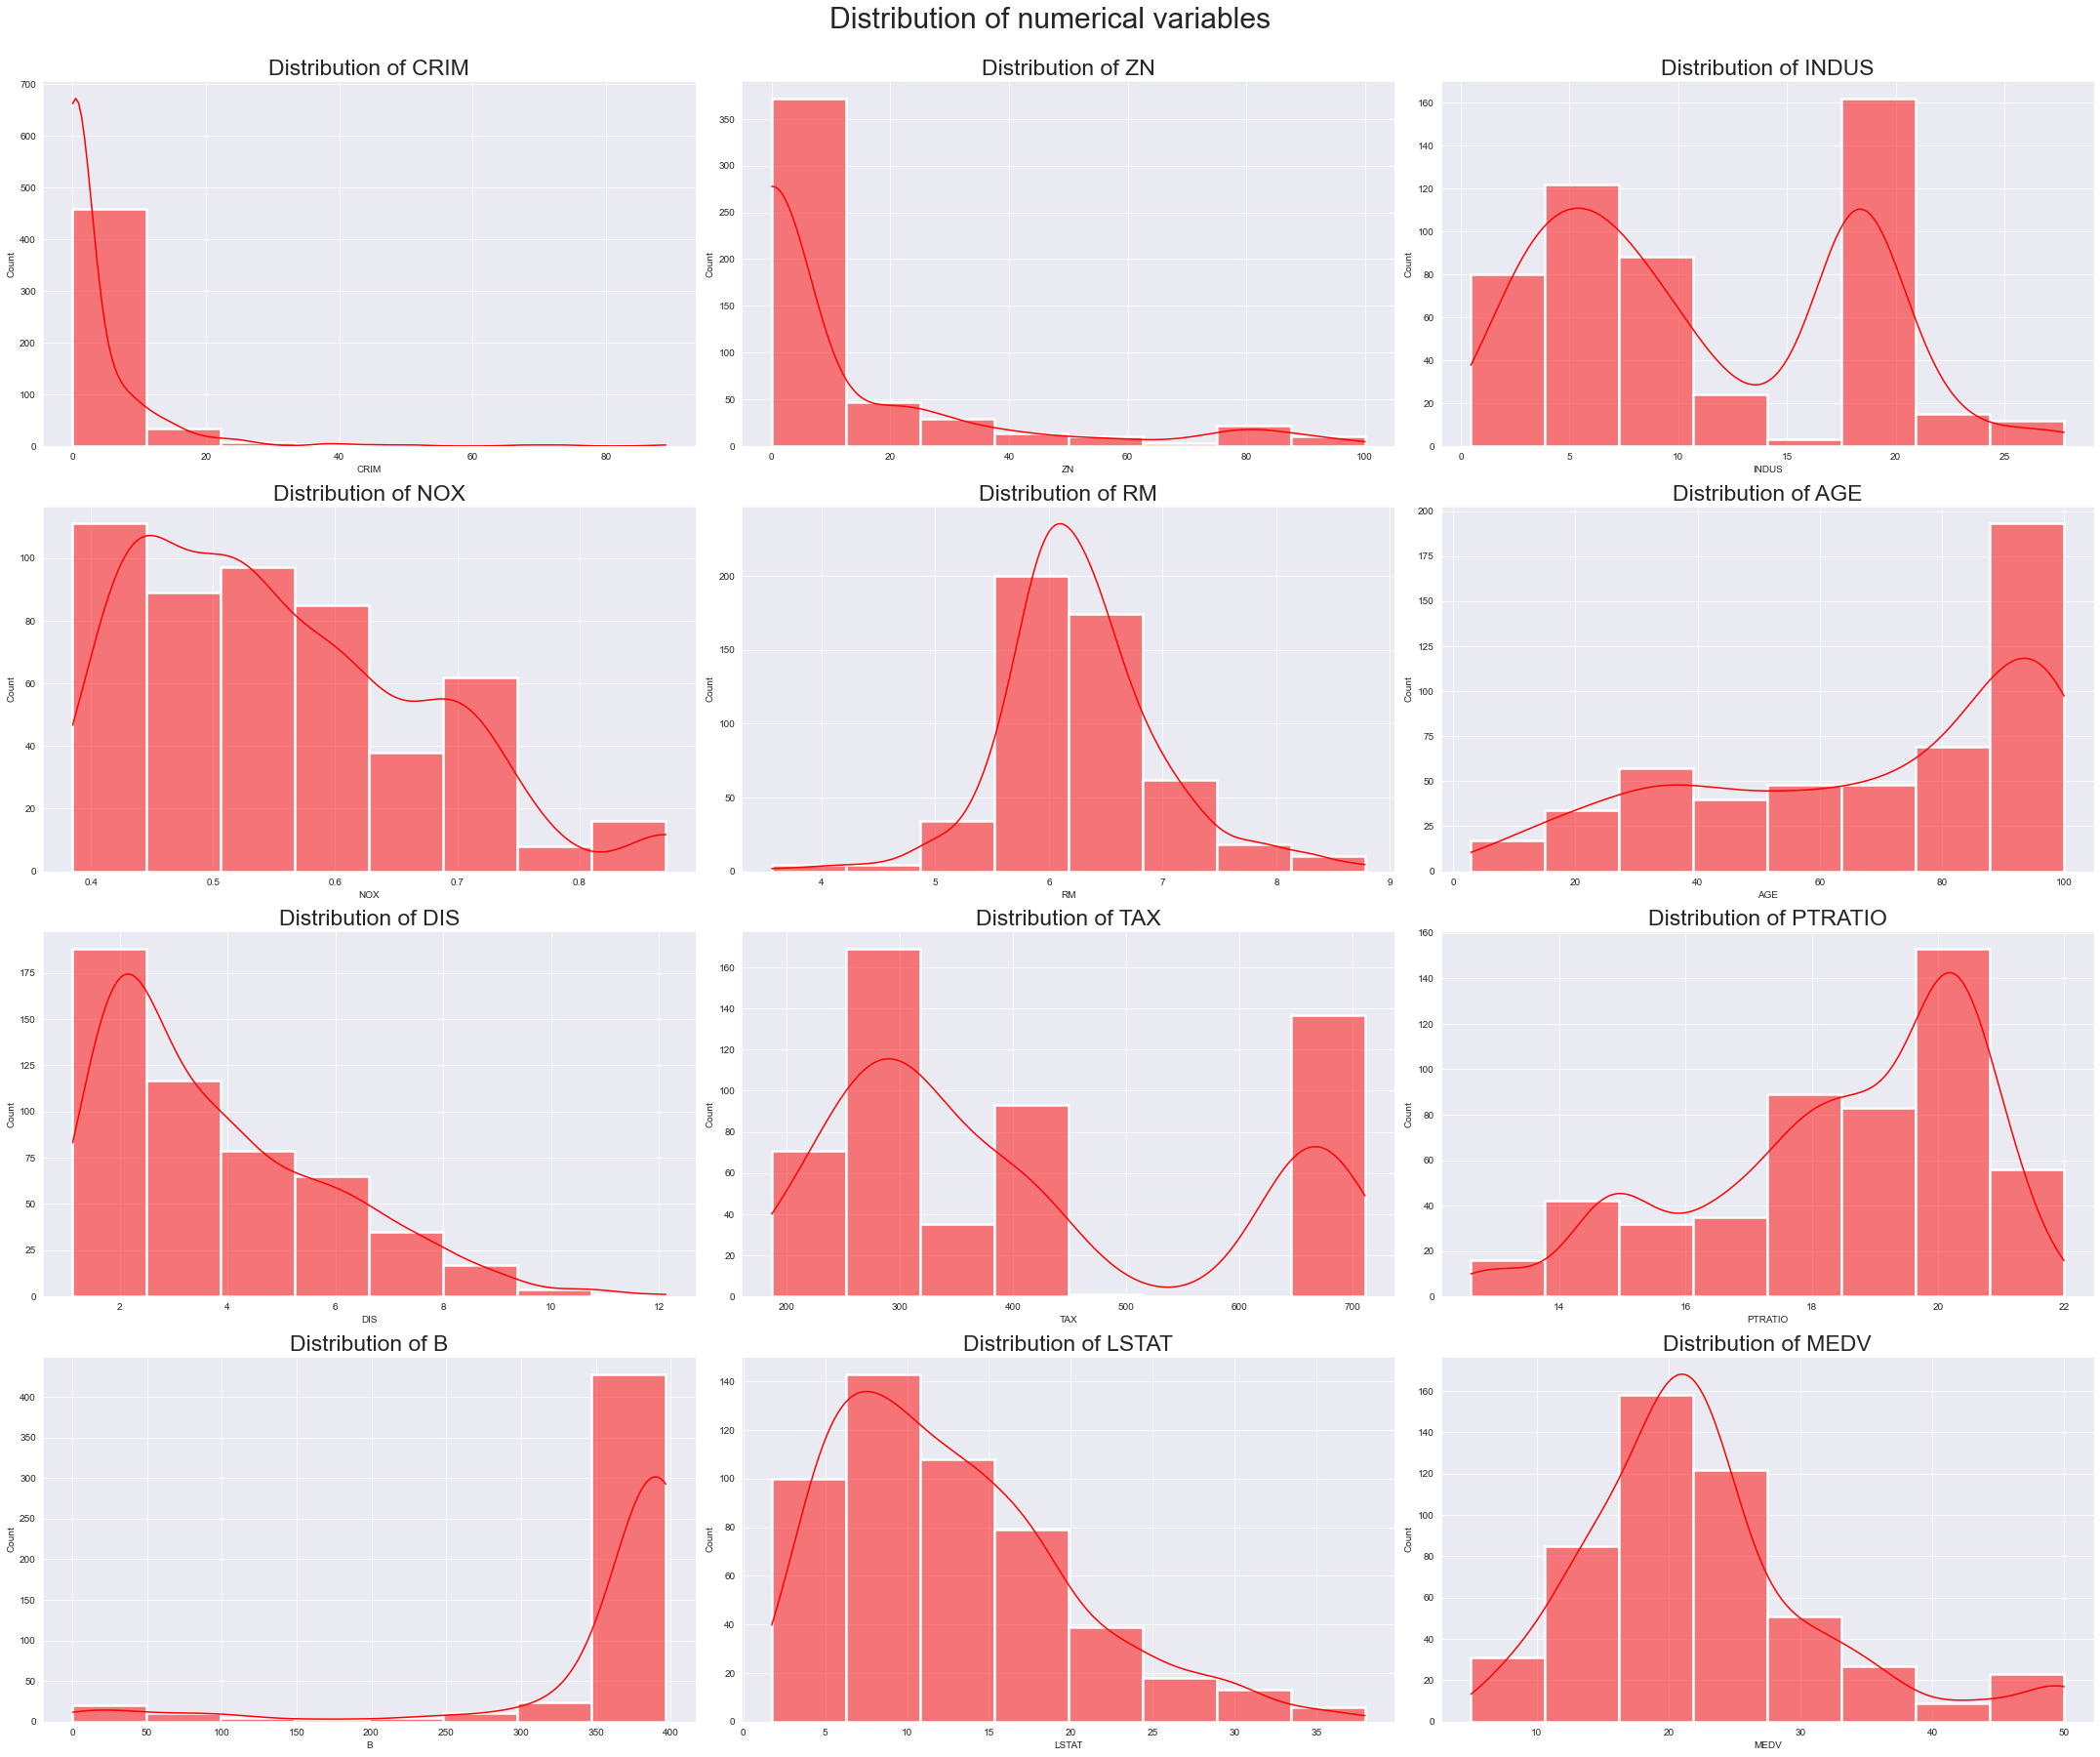

In [33]:
# To see variable are normally distributed or not creat a plot with subplot of each numerical variables
sns.set_style('darkgrid') # Here i used the .set_style function to take style of graph
count=1 # consider a variable count = 1
plt.subplots(figsize=(30, 30)) # Use .subplot function with size attribute
for i in numericals1:      # create a for loop to create a each subplot of columns
    plt.subplot(5,3,count) 
    ax = plt.gca() #The gca() fun is used to get the current Axes instance on the current figure matching the given keyword args, or create one.
    sns.histplot(Housing[i],kde=True,bins=8, palette="Set2", linewidth=2.5,color='r')#creating a hisplot for every i in numericals1
    ax.set_title("Distribution of {}".format(i), fontsize=23) #use set_title function to give title for each subplot
    count+=1 
    plt.tight_layout() # The tight_layout() fun is used to automatically adjust subplot parameters to give specified padding.
plt.suptitle('Distribution of numerical variables',y=1.02,fontsize=30) # use suptitle to give name of super figure
plt.show()

### 1) From Above Figure the variable 'CRIM','ZN','NOX','DIS','LSTAT' are right skewed

### 2) from above figure 'AGE','PTRATIO','B' are left skwed.

### 3) from above figure variables 'RM' and 'MEDV' are normally distributed and the variables 'TAX' and  'INDUS' are bimodal

### 4) Variables are skewed means there is any outliers, missing values.but in this dataset there is no missing values we have to cheack outrliers.

## Outleirs

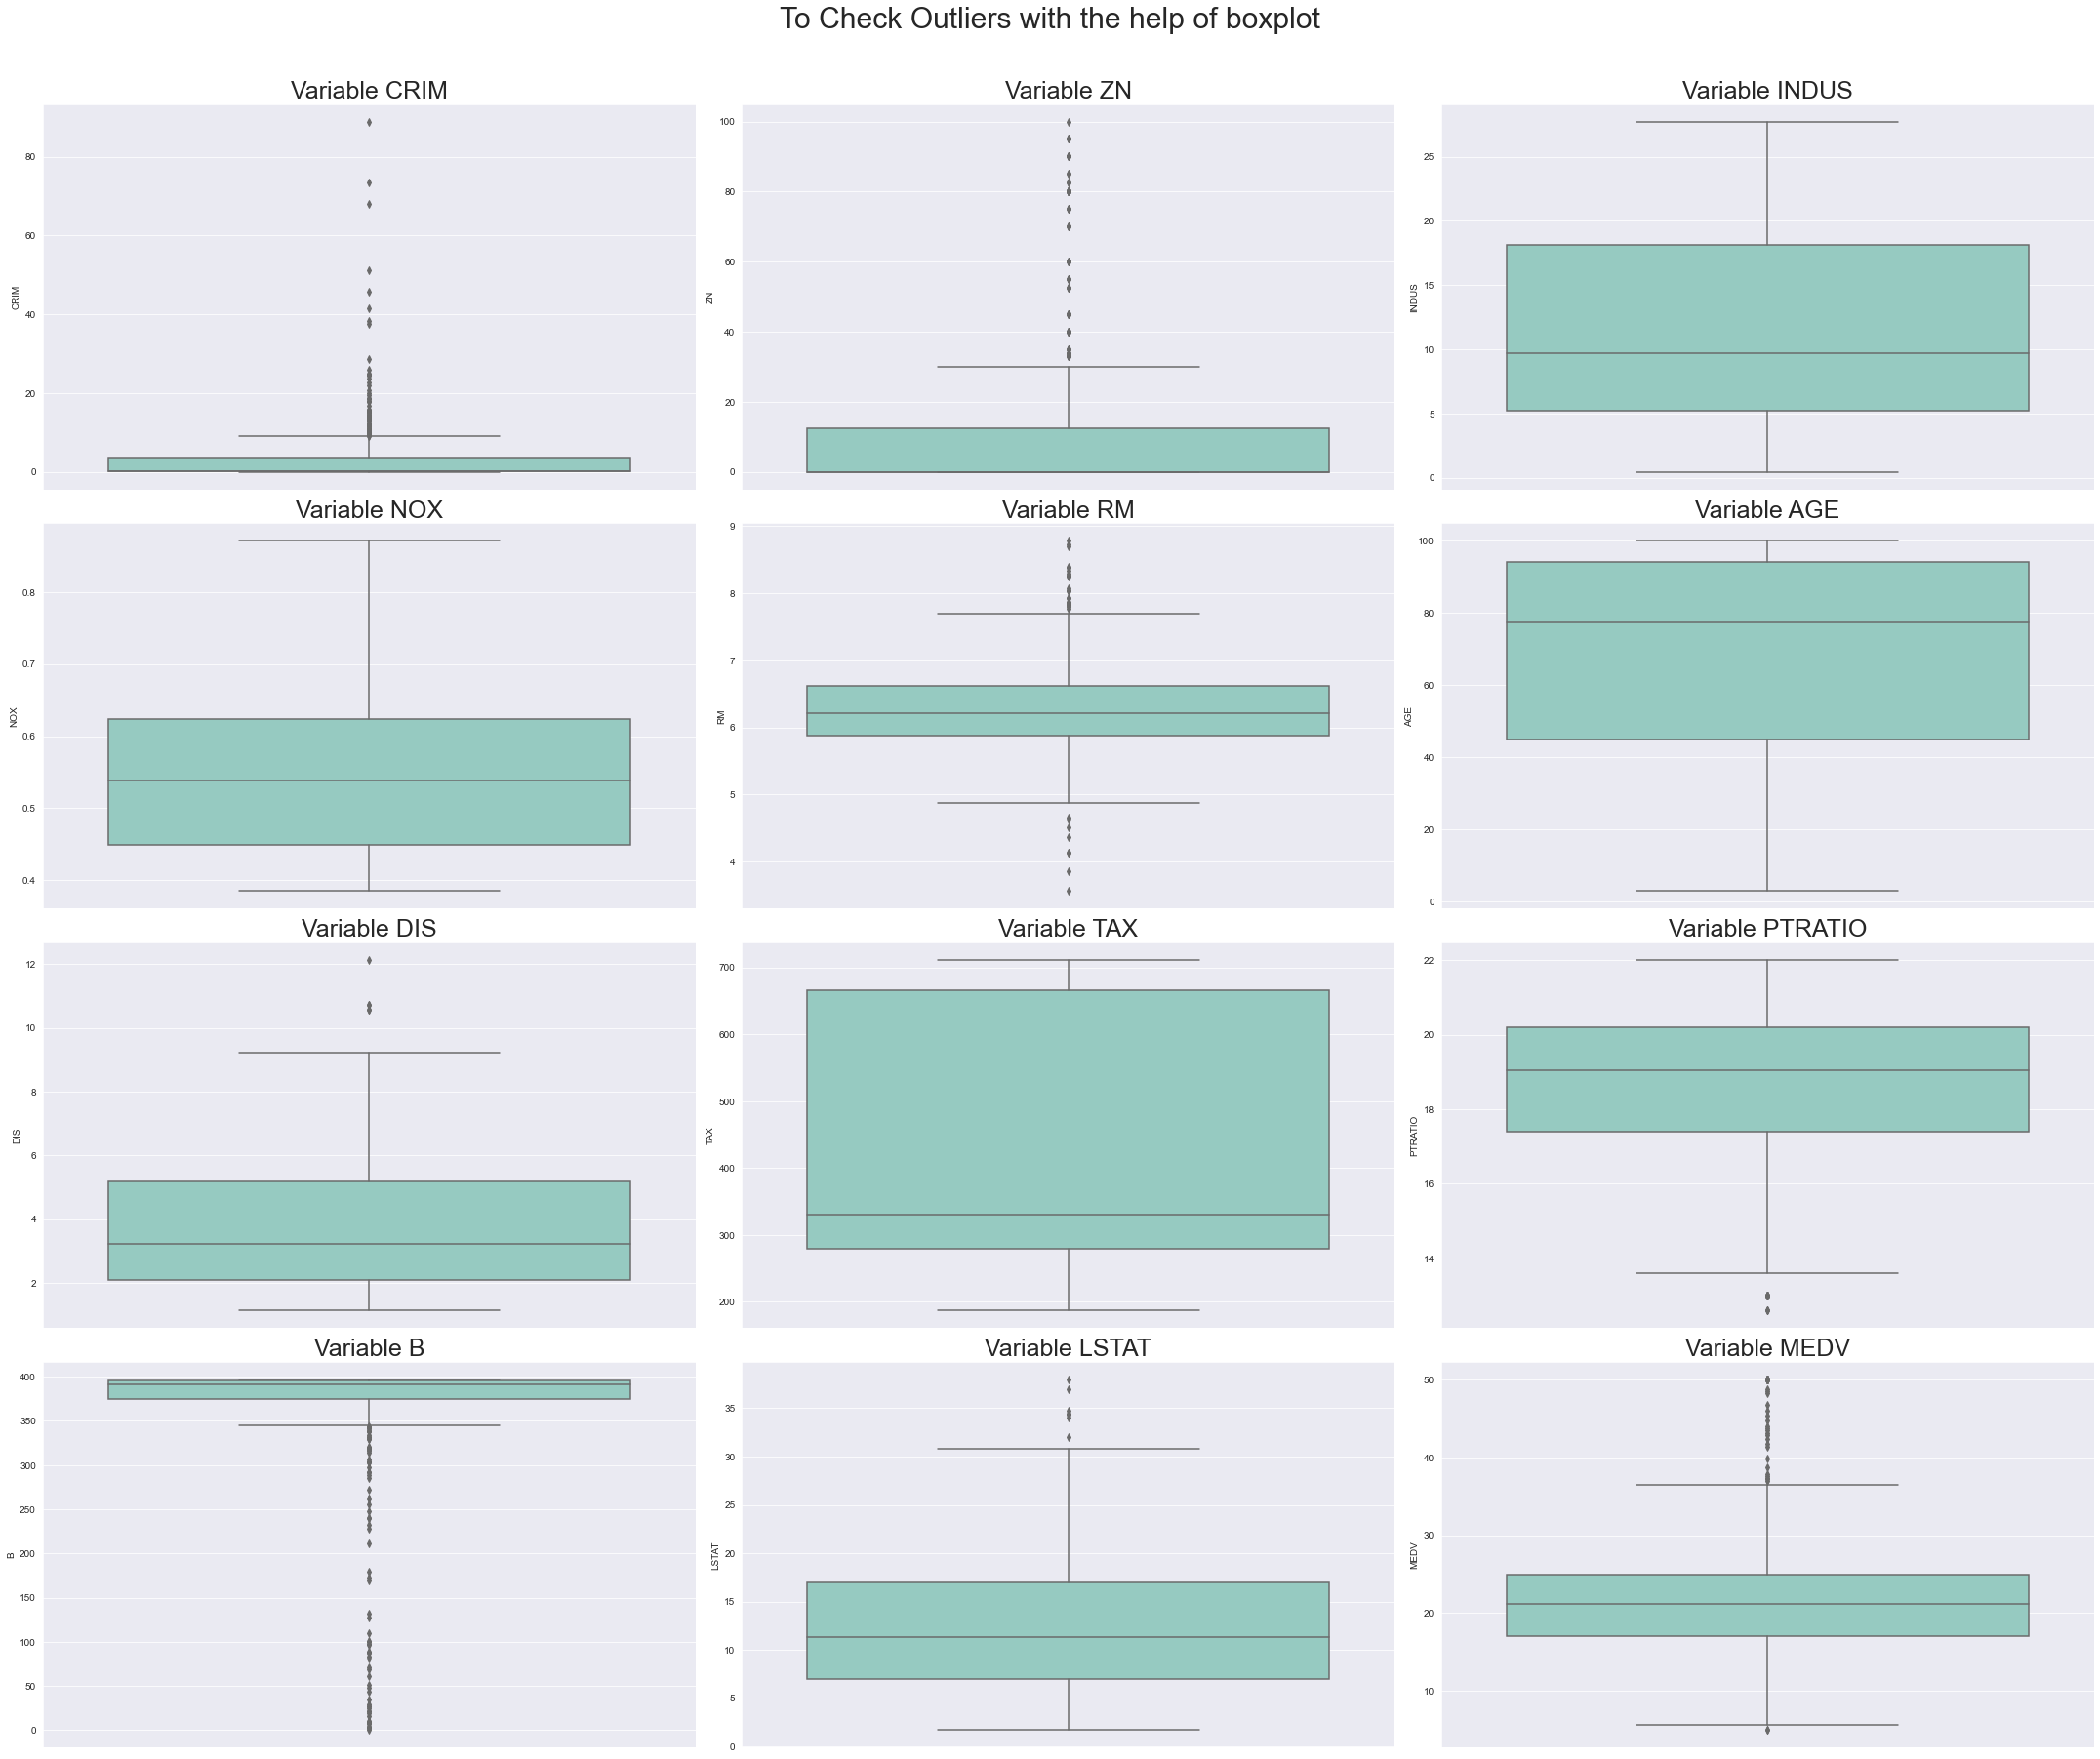

In [34]:
# Try to all boxplot in one shot
sns.set_style() #
count=1
plt.subplots(figsize=(30, 30))
for i in numericals1:
    plt.subplot(5,3,count)
    ax = plt.gca()
    sns.boxplot(y=Housing[i], palette="Set3")
    ax.set_title("Variable {}".format(i), fontsize=25)
    count+=1 
    plt.tight_layout()
# plt.suptitle("Outlier detection with help of boxblot", size=25)
plt.suptitle('To Check Outliers with the help of boxplot', y=1.03, fontsize=30)

plt.show()

### From Above figure the variable 'CRIM', 'ZN','RM','DIS','PTRATIO','B','LSTAT','MEDV' has outliers.


## Finding outliers

## z-score

* Basically Calculating Standard normal distribution.
* Describes any datapoint by finding their relationship between mean and standard deviation of the group of data points.
* It finds the distribution of data where mean is 0 and standard deviation is 1.
* If z-score value is greater than or less than 3 or -3 respectively that datapoint will be idendified as outlier.

In [39]:
z = np.abs(stats.zscore(Housing[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT','MEDV']]))
print(z)

         CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0    0.419782  0.284830  1.287909  0.144217  0.413672  0.120013  0.140214   
1    0.417339  0.487722  0.593381  0.740262  0.194274  0.367166  0.557160   
2    0.417342  0.487722  0.593381  0.740262  1.282714  0.265812  0.557160   
3    0.416750  0.487722  1.306878  0.835284  1.016303  0.809889  1.077737   
4    0.412482  0.487722  1.306878  0.835284  1.228577  0.511180  1.077737   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.413229  0.487722  0.115738  0.158124  0.439316  0.018673  0.625796   
502  0.415249  0.487722  0.115738  0.158124  0.234548  0.288933  0.716639   
503  0.413447  0.487722  0.115738  0.158124  0.984960  0.797449  0.773684   
504  0.407764  0.487722  0.115738  0.158124  0.725672  0.736996  0.668437   
505  0.415000  0.487722  0.115738  0.158124  0.362767  0.434732  0.613246   

          TAX   PTRATIO         B     LSTAT      MEDV  
0    0.666608  1.45

In [40]:
threshold = 3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 199, 200, 201, 202, 203, 204, 225, 256,
       257, 262, 283, 284, 347, 351, 352, 353, 353, 354, 355, 364, 365,
       367, 373, 374, 374, 380, 398, 404, 405, 406, 410, 410, 411, 412,
       412, 414, 414, 415, 416, 418, 418, 419, 423, 424, 425, 426, 427,
       427, 429, 431, 436, 437, 438, 445, 450, 454, 455, 456, 457, 466],
      dtype=int64), array([ 1,  1,  1,  9, 10,  1,  1,  1,  1,  1,  1,  4,  1,  4,  4,  1,  1,
        1,  6,  6,  1,  6,  6,  6,  4,  4,  4, 10,  4, 10,  0,  0,  0,  0,
        4,  0,  9,  9,  9, 10,  0, 10,  9,  9,  0,  9,  9,  9,  9,  9,  9,
        0,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype=int64))


In [41]:
threshold = -3
print(np.where(z< -3))

(array([], dtype=int64), array([], dtype=int64))


## Distribution of categorical variables

In [47]:
# to find the total number of each category
CHAS = Housing.CHAS.value_counts() # use value_count function
CHAS

0    471
1     35
Name: CHAS, dtype: int64

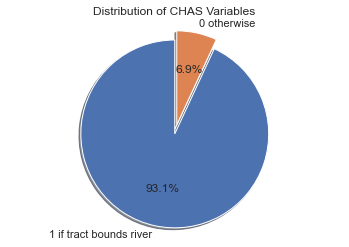

In [54]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1 if tract bounds river','0 otherwise'
sizes = [15, 30]
explode = (0, 0.1)  # only "explode" the 2nd slide

fig1, ax1 = plt.subplots()
ax1.pie(CHAS, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of CHAS Variables") # give title of variable
plt.show()

###  Here i used the pie chart to see the CHAS variable distribution in the form of percentage

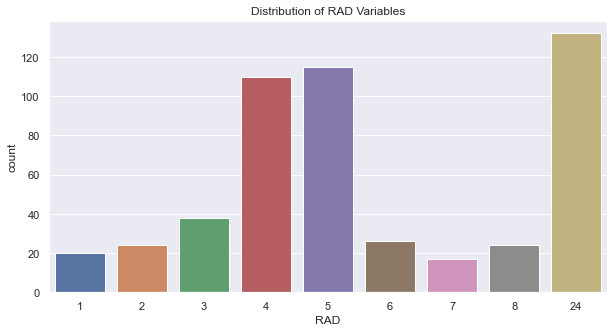

In [53]:
# To See distribution of RAD variable 
plt.figure(figsize=(10,5)) # set a figuresize
sns.set_theme(style="darkgrid") # use a set_theme
sns.countplot(x="RAD", data=Housing) # use countplot
plt.title("Distribution of RAD Variables") # give title
plt.show()

### Here i used the count plot to see how RAD variable distributed. i can see the index 24 takes more.

## Numerical Vs Categorical  plots

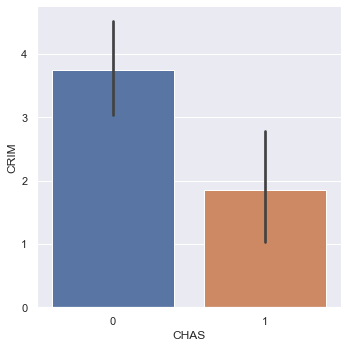

In [57]:
sns.catplot(x="CHAS", y="CRIM", kind="bar", data=Housing)

## from above fig i can CRIM of 0 (i.e. otherwise) is maximum compare to 1(i.e.if tract bounds river)

## Numerical Vs Numerical categoriacl plots

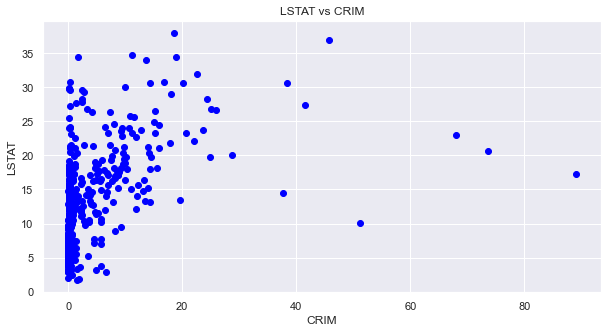

In [59]:
plt.figure(figsize = (10,5))
plt.title("LSTAT vs CRIM")
plt.xlabel("CRIM")
plt.ylabel("LSTAT")
plt.scatter(Housing['CRIM'], Housing['LSTAT'], color = 'blue')
plt.show()

### Here i used the scatter plot to see Relationship between per capita crime rate by town vs percentage of lower status of the population

<AxesSubplot:>

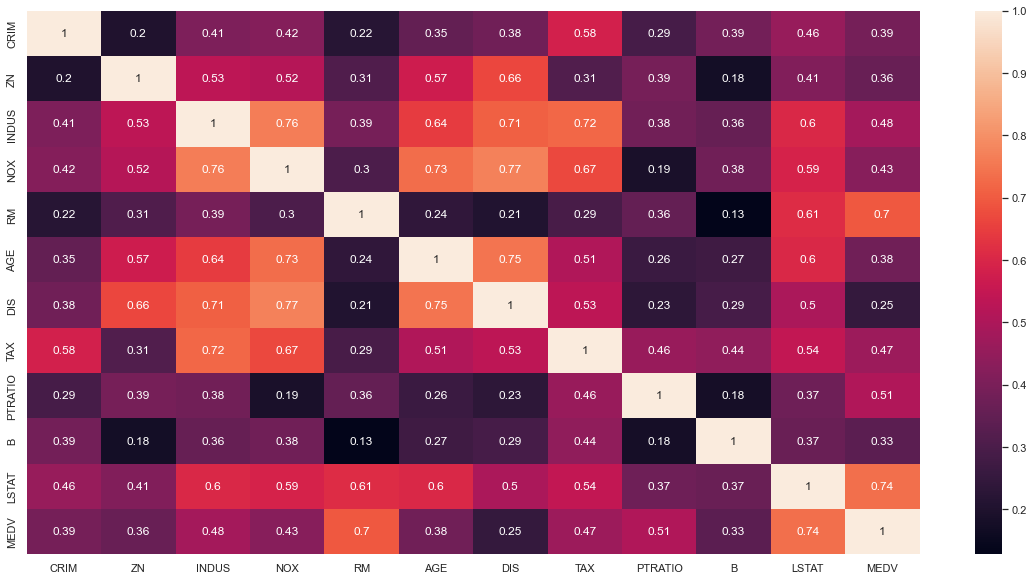

In [61]:
# To see correlation of numerical variables
plt.figure(figsize=(20, 10)) #
sns.heatmap(Housing.corr().abs(),  annot=True)

### From correlation matrix, i can see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

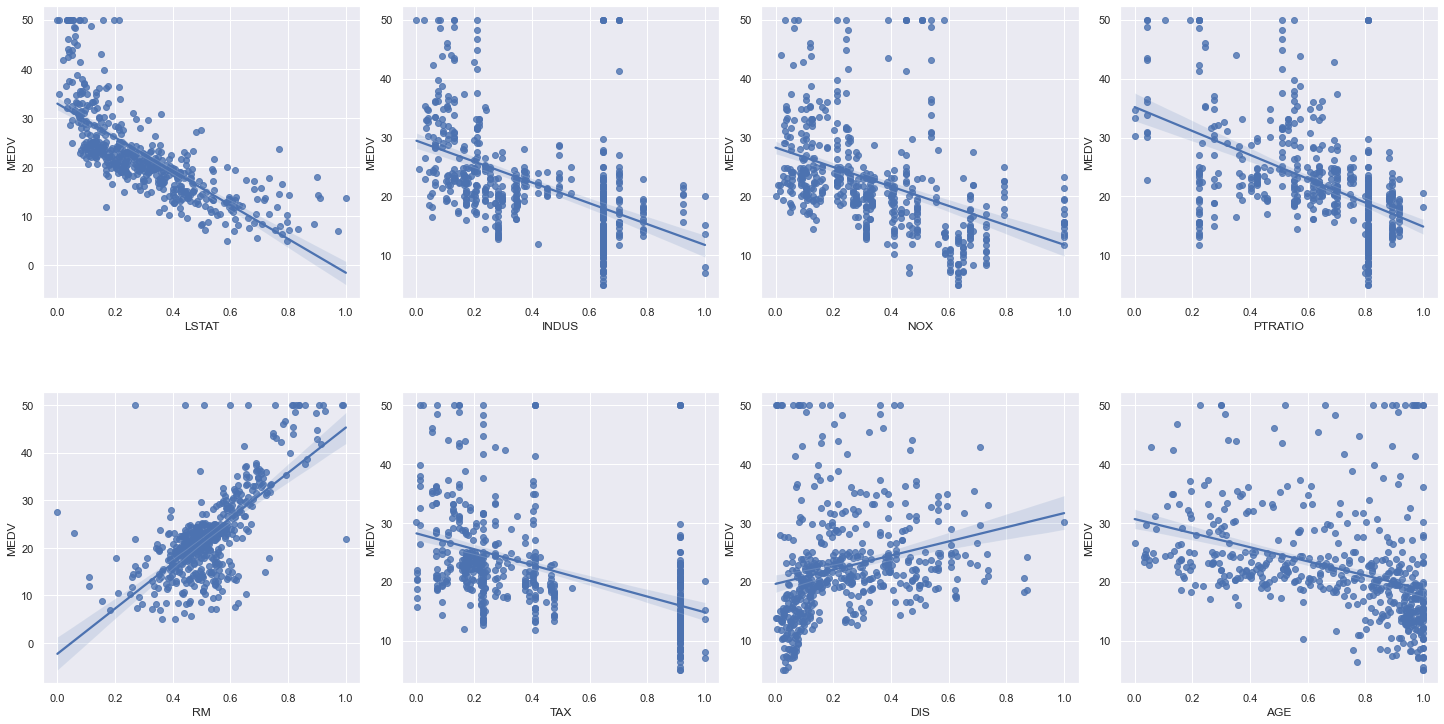

In [62]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = Housing.loc[:,column_sels]
y = Housing['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Here i used the regplot i may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. .

## Conclusions:

### 1) The Housing Dataset has no missing values.

### 2) TAX and RAD are highly correlated features.

### 3) CRIM of 0 (i.e. otherwise) is maximum compare to 1(i.e.if tract bounds river)